In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

# print(np.__version__)
# print(pd.__version__)
# print(mpl.__version__)

# 解决中文乱码问题
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"]=False # 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
%matplotlib inline  
# 排除警告
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv(r'dataset.csv')
print(data.head(3))
print('-'*50)
print(data.columns)
print('-'*50)

      FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-05-21 02:32:48   
1  22001.0     Acadia       Louisiana             US  2020-05-21 02:32:48   
2  51001.0   Accomack        Virginia             US  2020-05-21 02:32:48   

         Lat      Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334 -82.461707         36       0          0      36   
1  30.295065 -92.414197        262      12          0     250   
2  37.767072 -75.632346        709      11          0     698   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
--------------------------------------------------
Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')
------------------------------------------------

In [15]:
# 查看有多少个国家
total_country = data['Country_Region'].count() # 统计出现次数
print(total_country) 
total_country = data['Country_Region'].unique() # 去重明细
print(total_country)
total_country = data['Country_Region'].nunique() # 去重统计
print(total_country)

3394
['US' 'Italy' 'Brazil' 'Mexico' 'Canada' 'Spain' 'United Kingdom' 'China'
 'Chile' 'Netherlands' 'Australia' 'Germany' 'Denmark' 'France'
 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'Colombia' 'Comoros'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Diamond Princess' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indones

In [19]:
# 统计美国确诊和死亡人数
total_in_US = data[  data['Country_Region'] == 'US'  ]
# 用于验证的测试代码
print(total_in_US['Country_Region'].count())
print(total_in_US['Country_Region'].unique())
print(total_in_US['Country_Region'].nunique())

3000
['US']
1


In [22]:
total_in_US = data[  data['Country_Region'] == 'US'  ][['Confirmed','Deaths']].sum()
print(total_in_US)

Confirmed    1551853
Deaths         93439
dtype: int64


In [31]:
# 统计各个国家的确诊和死亡
each_country = data[['Country_Region','Confirmed','Deaths']].groupby('Country_Region').agg('sum') # groupby分组，agg聚合方式
print(each_country.sort_values(by = 'Confirmed',ascending= False).head(10)) # sort_values 排序，by：排序列，ascending排序方式，True升序，False降序

# 这里的打印出来的结果只有两列，最左边一列是索引值，不属于列，可以在groupby中添加一个as_index=False 的参数。
print(each_country.columns)

                Confirmed  Deaths
Country_Region                   
US                1551853   93439
Russia             308705    2972
Brazil             291579   18859
United Kingdom     249619   35786
Spain              232555   27888
Italy              227364   32330
France             181700   28135
Germany            178473    8144
Turkey             152587    4222
Iran               126949    7183
Index(['Confirmed', 'Deaths'], dtype='object')


In [41]:
each_country = data[['Country_Region','Confirmed','Deaths']].groupby('Country_Region',as_index=False).agg('sum') # groupby分组，agg聚合方式
print(each_country.sort_values(by = 'Confirmed',ascending= False).head(10)) # sort_values 排序，by：排序列，ascending排序方式，True升序，False降序

     Country_Region  Confirmed  Deaths
174              US    1551853   93439
140          Russia     308705    2972
23           Brazil     291579   18859
178  United Kingdom     249619   35786
158           Spain     232555   27888
85            Italy     227364   32330
62           France     181700   28135
66          Germany     178473    8144
173          Turkey     152587    4222
81             Iran     126949    7183


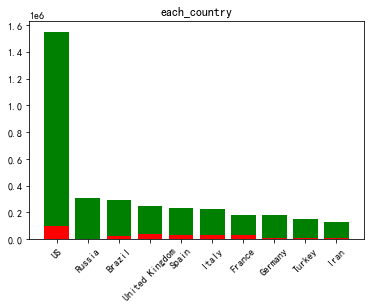

In [43]:
# 画图
result = each_country.sort_values(by = 'Confirmed',ascending= False).head(10)
x = result['Country_Region']
y1 = result['Confirmed']
y2 = result['Deaths']

plt.bar(range(len(x)),y1,color='green') #将x转为int类型
plt.bar(range(len(x)),y2,color='red') #将x转为int类型
plt.xticks(range(len(x)),x,rotation= 45) #int和x建立新的映射关系，并旋转45度rotation函数。
plt.title('each_country')
plt.show()

In [45]:
# 统计中国数据
total_in_china = data[  data['Country_Region'] == 'China'  ][['Confirmed','Active']].sum()
print(total_in_china)

Confirmed    84063
Active         115
dtype: int64


In [48]:
# 统计中国各个省份的数据
china_each_province = data[  data['Country_Region'] == 'China'  ][['Province_State','Confirmed','Active']]
print(china_each_province.sort_values(by = 'Confirmed',ascending=False))

      Province_State  Confirmed  Active
3084           Hubei      68135       7
3072       Guangdong       1590       3
3080           Henan       1276       0
3215        Zhejiang       1268       0
3083       Hong Kong       1055      26
3085           Hunan       1019       0
3002           Anhui        991       0
3079    Heilongjiang        945       0
3090         Jiangxi        937       0
3177        Shandong        788       1
3178        Shanghai        666      18
3089         Jiangsu        653       0
3019         Beijing        593       6
3043       Chongqing        579       0
3180         Sichuan        561       0
3061          Fujian        356       0
3078           Hebei        328       0
3176         Shaanxi        308       2
3073         Guangxi        254       0
3086  Inner Mongolia        216      19
3179          Shanxi        198       0
3192         Tianjin        192       2
3213          Yunnan        185       0
3076          Hainan        169       1


In [57]:
# 统计死亡人数大于中国的人数
china_death_num = data[ data['Country_Region'] == 'China' ]['Deaths'].sum() # 这里的deaths如果放在双层[[]]里的话，和单层输出的格式是不一样的
# print(china_death_num)
each_country_death = data[['Country_Region','Deaths']].groupby('Country_Region',as_index=False).agg('sum')
# print(each_country_death)
death_more_than_china = each_country_death[ each_country_death['Deaths'] > china_death_num]
print(death_more_than_china.sort_values(by='Deaths',ascending=False))

     Country_Region  Deaths
174              US   93439
178  United Kingdom   35786
85            Italy   32330
62           France   28135
158           Spain   27888
23           Brazil   18859
16          Belgium    9150
66          Germany    8144
81             Iran    7183
32           Canada    6150
113          Mexico    6090
122     Netherlands    5767
